##Import Laibraries


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

##Import Dataset

In [54]:
df = pd.read_csv('Mall_Customers.csv')

##EDA

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.shape

(200, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


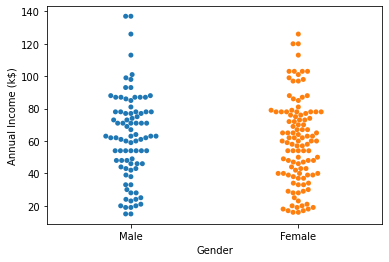

In [59]:
sns.swarmplot(x = 'Gender', y ='Annual Income (k$)',data=df)

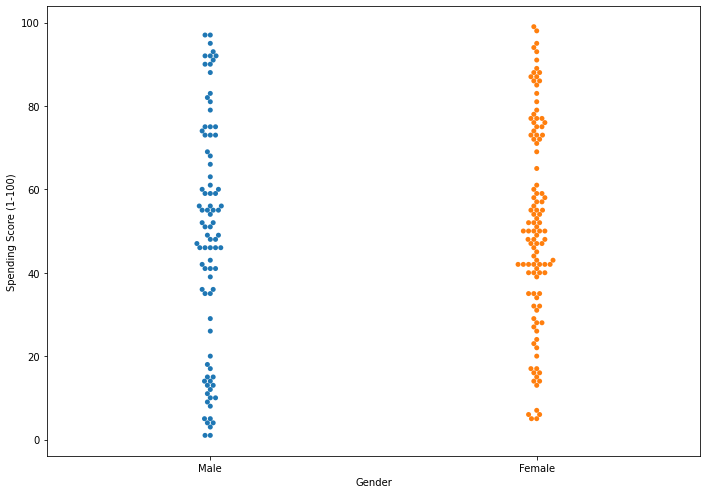

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
fig = sns.swarmplot(x = 'Gender', y = 'Spending Score (1-100)',data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


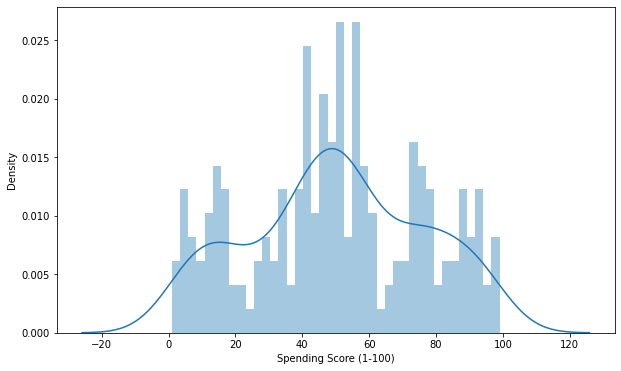

In [61]:
f,ax = plt.subplots(figsize=(10,6))
sns.distplot(df['Spending Score (1-100)'],bins=40)

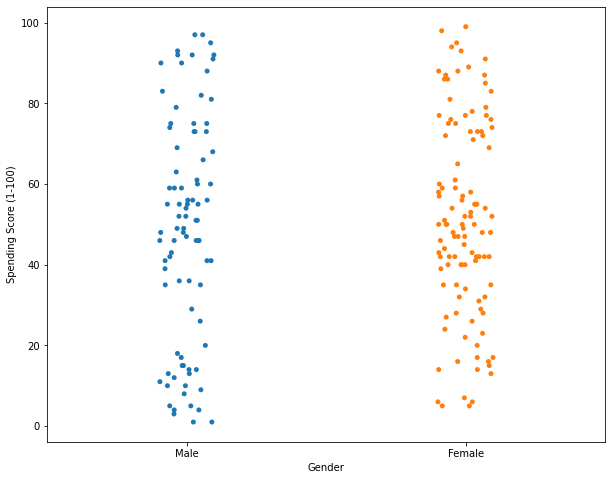

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
fig = sns.stripplot(x = 'Gender', y = 'Spending Score (1-100)',data = df)

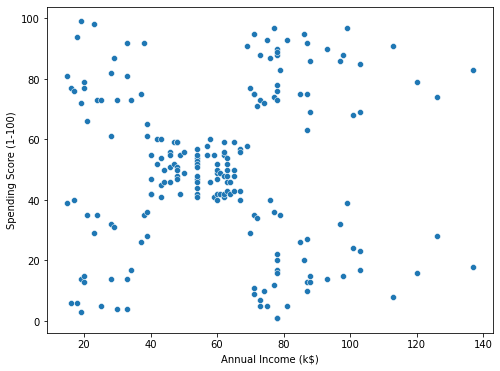

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig = sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data = df)

In [64]:
X = df.iloc[:,[3,4]].values

In [65]:
X[0]

array([15, 39])

In [66]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))

##Elbow Method to find no of clusters

In [67]:
from sklearn.cluster import KMeans

In [68]:
wcss = []
for i in range(1,40):
  kms = KMeans(n_clusters=i,init='k-means++',random_state=0)
  kms.fit(X)
  wcss.append(kms.inertia_)

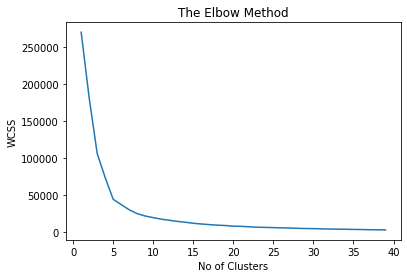

In [69]:
plt.plot(range(1,40),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

##Model Creation == KMeans

In [70]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [71]:
y_pred = kmeans.fit_predict(X)

In [72]:
print(y_pred)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


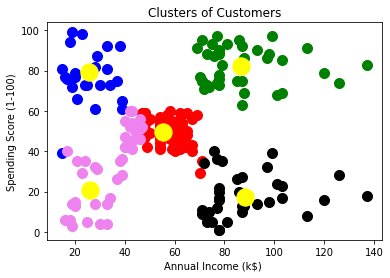

In [75]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='violet', label='Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='black', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Spending Score (1-100)')
plt.show()

##Model Creation == DBSCAN

In [76]:
from sklearn.cluster import DBSCAN

In [78]:
db = DBSCAN(eps=0.5,min_samples=20)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [80]:
y_db = db.fit_predict(X)

Text(0.5, 1.0, 'Cluster Detemined by DBSCAN')

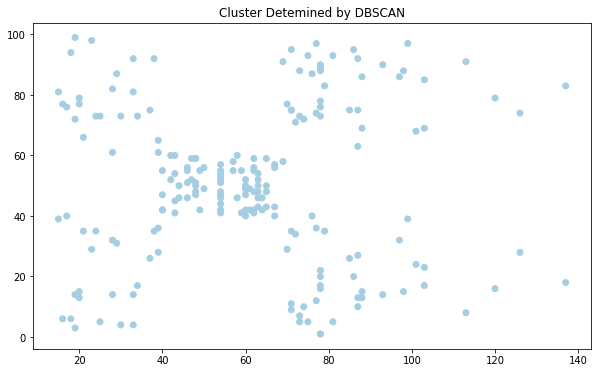

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_db,cmap='Paired')
plt.title('Cluster Detemined by DBSCAN')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')